In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import essential packages
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# sklearn helper modules
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Grid Search, Cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate

# Scoring function
from sklearn.metrics import accuracy_score, f1_score

# Plotting settings
# In case the font Cambria is not locally installed in you system, 
# comment out the line below
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 10,6

# Define data paths that are necessary
DPATH = "../data/"
IPATH = "../images/"
RPATH = "../results/"
CNPATH = "../data/control/"
CDPATH = "../data/condition/"
PSPATH = "../parameter_search/"

np.random.seed(0)

In [2]:
# Load dataset
X = np.load(DPATH+"final_X.npy")
X_norm = np.load(DPATH+"final_X_norm.npy")
y = np.load(DPATH+"final_y.npy")
y = y.reshape(-1, )

pca = PCA()
X_transformed = pca.fit_transform(X)

print(X.shape, y.shape, X_transformed.shape)

(773, 1440) (773,) (773, 773)


In [3]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.20, random_state=42)

X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=42)
X_val_norm, X_test_norm, y_val, y_test = train_test_split(X_test_norm, y_test, test_size=0.20, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(X_train_norm.shape, X_val_norm.shape, X_test_norm.shape)

(618, 1440) (124, 1440) (31, 1440)
(618, 1440) (124, 1440) (31, 1440)


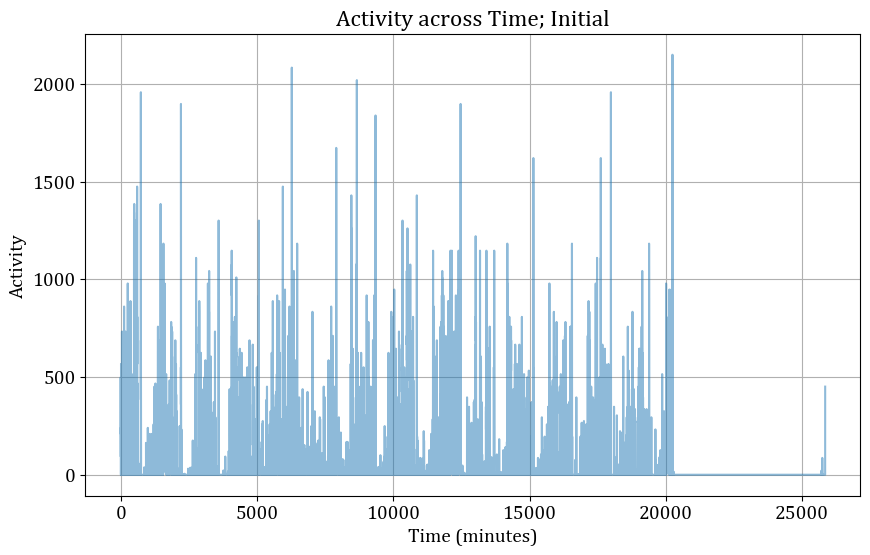

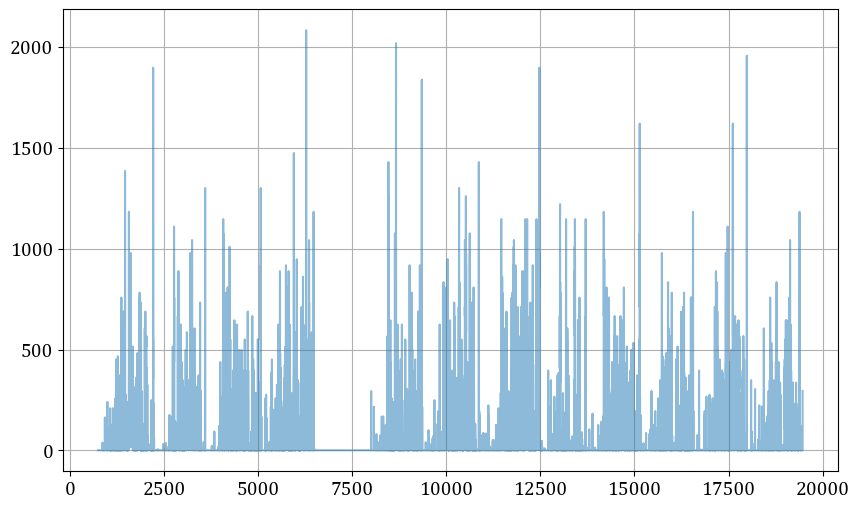

In [4]:
# Stack the dataset to create a matrix of size num_samples*1440 for the control group
threshold = 50
mapping_condn = {}

num_data_points = pd.NamedAgg(column="activity", aggfunc="count")
avg_act = pd.NamedAgg(column="activity", aggfunc="mean")
max_act = pd.NamedAgg(column="activity", aggfunc="max")


for condn_idx in range(19,20):
    condn_fname = "condition_"+str(condn_idx+1)+".csv"
    # Load a condition file
    df_act_condn = pd.read_csv(CDPATH+condn_fname)
    df_act_condn.head(10)
    
    plt.figure()
    plt.plot(df_act_condn["activity"], alpha=0.5)
    plt.xlabel("Time (minutes)")
    plt.ylabel("Activity")
    plt.title("Activity across Time; Initial")

    
    df_new = df_act_condn.groupby("date", as_index=False).agg(num_data_points=num_data_points, avg_act=avg_act, max_act=max_act)
    
    # Masking
    cleaned_df = df_new[df_new["num_data_points"] == 1440]
    cleaned_df = cleaned_df[cleaned_df["avg_act"] > threshold]

    tmp_data = df_act_condn[df_act_condn["date"].isin(cleaned_df["date"])]
    plt.figure()
    plt.plot(tmp_data["activity"], alpha=0.5)
    # plt.fill_between(range(tmp_data["activity"].size), tmp_data["activity"], tmp_data["activity"]>0, alpha=0.5)

Text(0.5, 1.0, 'Activity across Time; Final')

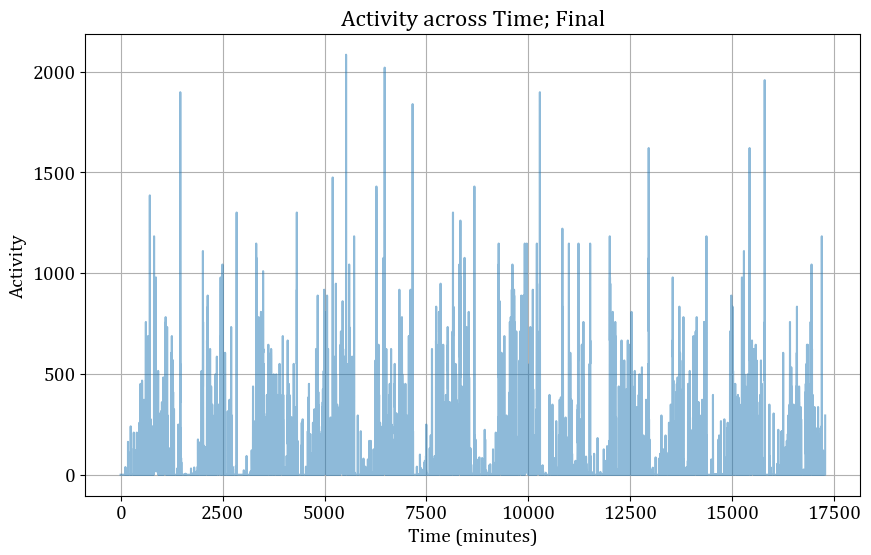

In [5]:
a = []
for date in cleaned_df["date"]:
    tmp = df_act_condn[df_act_condn["date"]==date]
    a.extend(tmp["activity"].to_list())
    
plt.plot(a, alpha=0.5)
plt.xlabel("Time (minutes)")
plt.ylabel("Activity")
plt.title("Activity across Time; Final")

In [6]:
cleaned_df

,date,num_data_points,avg_act,max_act
1,2002-05-25,1440,72.238194,1386
2,2002-05-26,1440,61.306250,1898
3,2002-05-27,1440,72.115278,1147
4,2002-05-28,1440,91.186111,2084
6,2002-05-30,1440,69.749306,2020
7,2002-05-31,1440,80.160417,1301
8,2002-06-01,1440,89.594444,1430
9,2002-06-02,1440,75.177083,1898
10,2002-06-03,1440,57.806250,1621
11,2002-06-04,1440,50.079861,1183


In [7]:
PSPATH = "../parameter_search/"

In [8]:
fnames = [i for i in os.listdir(PSPATH) if not i.startswith("pca")]
fnames.sort()
combined_df = pd.DataFrame()
best_df = pd.DataFrame()

for i in fnames:
    print(i)
    df = pd.read_csv(PSPATH+i, index_col=0)
    df["name"] = i[:-4]
    combined_df = pd.concat([combined_df, df.head()])
    best_df = pd.concat([best_df, df.head(1)])

knn_norm_param_tuning.csv
knn_norm_standard_scaler_param_tuning.csv
knn_param_tuning.csv
knn_standard_scaler_param_tuning.csv
lr_norm_param_tuning.csv
lr_norm_standard_scaler_param_tuning.csv
lr_param_tuning.csv
lr_standard_scaler_param_tuning.csv
mlp_norm_param_tuning.csv
mlp_norm_standard_scaler_param_tuning.csv
mlp_param_tuning.csv
mlp_standard_scaler_param_tuning.csv
rf_norm_param_tuning.csv
rf_param_tuning.csv
rf_standard_scaler_param_tuning.csv
svc_norm_param_tuning.csv
svc_norm_standard_scaler_param_tuning.csv
svc_param_tuning.csv
svc_standard_scaler_param_tuning.csv


In [9]:
best_df.sort_values("mean_test_score", ascending=False, inplace=True, ignore_index=True)

In [10]:
best_df["model"] = best_df["name"].str.split("_").str[0]
best_df["norm_data"] = "norm" == best_df["name"].str.split("_").str[1]
best_df["SS"] = ("standard" == best_df["name"].str.split("_").str[2]) | ("standard" == best_df["name"].str.split("_").str[1])
best_df[["model", "norm_data", "SS", "mean_test_score", "std_test_score"]]

,model,norm_data,SS,mean_test_score,std_test_score
0,rf,False,True,0.753870,0.037762
1,rf,True,False,0.753870,0.037762
2,knn,False,True,0.682087,0.011658
3,svc,False,True,0.679223,0.039196
4,svc,False,False,0.677769,0.042433
5,svc,True,True,0.676239,0.029856
6,mlp,False,True,0.673263,0.055726
7,knn,True,True,0.669809,0.037614
8,knn,False,False,0.668387,0.023669
9,svc,True,False,0.667079,0.042366


In [11]:
best_df["Name"] = best_df["model"].str.upper()
best_df["Name"][best_df["SS"]] += "_SS"
best_df["Name"][best_df["norm_data"]] += "_ND"
best_df["Name"]

0         RF_SS
1         RF_ND
2        KNN_SS
3        SVC_SS
4           SVC
5     SVC_SS_ND
6        MLP_SS
7     KNN_SS_ND
8           KNN
9        SVC_ND
10    MLP_SS_ND
11       KNN_ND
12        LR_SS
13           RF
14     LR_SS_ND
15       MLP_ND
16        LR_ND
17           LR
18          MLP
Name: Name, dtype: object

In [12]:
best_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,param_kernel,param_svc__C,param_svc__decision_function_shape,param_svc__degree,param_svc__gamma,param_svc__kernel,model,norm_data,SS,Name
0,0.293504,0.006933,0.004937,0.000573,NaN,NaN,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.693069,0.747475,0.787234,...,NaN,NaN,NaN,NaN,NaN,NaN,rf,False,True,RF_SS
1,0.274521,0.004981,0.003205,0.000095,NaN,NaN,"{'max_features': 'sqrt', 'min_samples_split': ...",0.693069,0.747475,0.787234,...,NaN,NaN,NaN,NaN,NaN,NaN,rf,True,False,RF_ND
2,0.008568,0.000549,0.007500,0.000571,NaN,NaN,"{'knn__n_neighbors': 10, 'knn__weights': 'unif...",0.698413,0.671756,0.683333,...,NaN,NaN,NaN,NaN,NaN,NaN,knn,False,True,KNN_SS
3,0.223148,0.001117,0.050673,0.000232,NaN,NaN,"{'svc__C': 10, 'svc__decision_function_shape':...",0.656934,0.706767,0.612245,...,NaN,10.0,ovr,3.0,auto,poly,svc,False,True,SVC_SS
4,0.181854,0.001074,0.043947,0.000585,NaN,NaN,"{'C': 0.5, 'decision_function_shape': 'ovo', '...",0.692913,0.708661,0.595420,...,poly,NaN,NaN,NaN,NaN,NaN,svc,False,False,SVC
5,0.228440,0.002595,0.055302,0.000846,NaN,NaN,"{'svc__C': 10, 'svc__decision_function_shape':...",0.676692,0.634921,0.652174,...,NaN,10.0,ovr,3.0,scale,poly,svc,True,True,SVC_SS_ND
6,0.607500,0.106489,0.002378,0.000484,NaN,NaN,"{'mlp__activation': 'relu', 'mlp__alpha': 1e-0...",0.698113,0.633663,0.612245,...,NaN,NaN,NaN,NaN,NaN,NaN,mlp,False,True,MLP_SS
7,0.007195,0.000721,0.006337,0.000148,NaN,NaN,"{'knn__n_neighbors': 10, 'knn__weights': 'dist...",0.630137,0.639456,0.661972,...,NaN,NaN,NaN,NaN,NaN,NaN,knn,True,True,KNN_SS_ND
8,0.000761,0.000031,0.005862,0.000197,10.0,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.682540,0.641221,0.650407,...,NaN,NaN,NaN,NaN,NaN,NaN,knn,False,False,KNN
9,0.222252,0.001817,0.051622,0.000836,NaN,NaN,"{'C': 50, 'decision_function_shape': 'ovo', 'd...",0.656000,0.705882,0.590909,...,poly,NaN,NaN,NaN,NaN,NaN,svc,True,False,SVC_ND


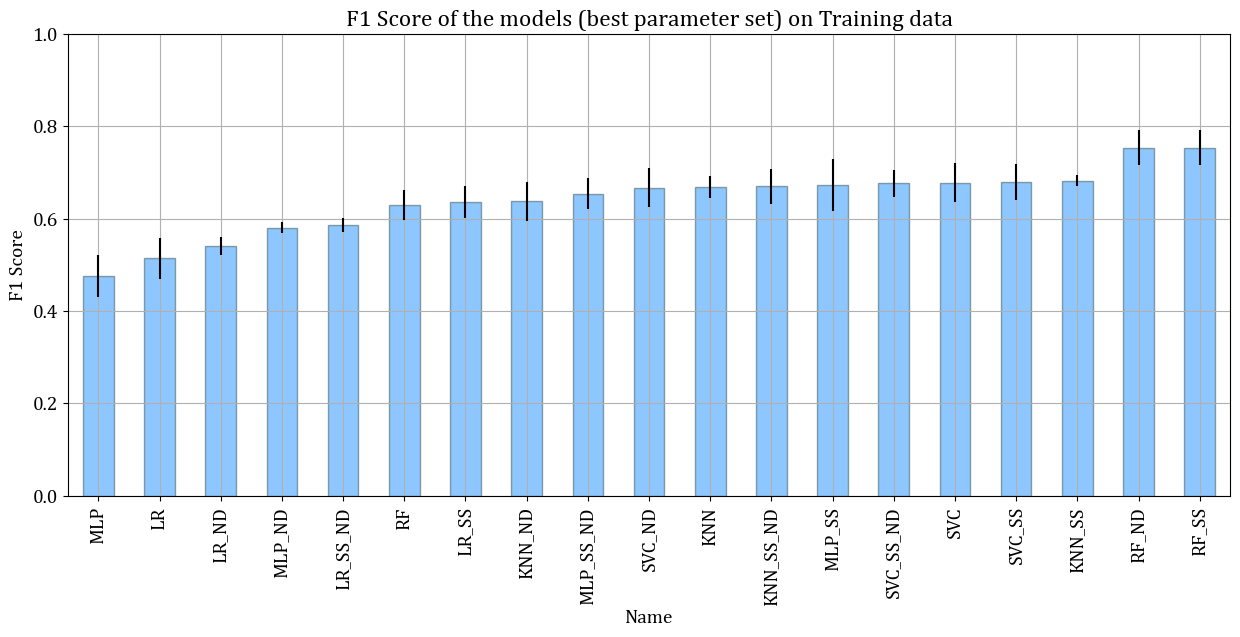

In [13]:
best_df.sort_values("mean_test_score", inplace=True)
best_df.plot.bar(x="Name", y="mean_test_score", yerr="std_test_score", color="dodgerblue", alpha=0.5, \
                 edgecolor="darkslategray", title="F1 Score of the models (best parameter set) on Training data", \
                 legend=False, figsize=[15,6], rot=90, grid=True, ylim=[0,1])
plt.ylabel("F1 Score")
plt.show()

In [14]:
combined_df.sort_values("mean_test_score", ascending=False, inplace=True)
combined_df[["name", "mean_test_score", "std_test_score", "params"]].head(20)

,name,mean_test_score,std_test_score,params
1,rf_standard_scaler_param_tuning,0.776462,0.046514,"{'rf__max_features': 'sqrt', 'rf__min_samples_..."
1,rf_norm_param_tuning,0.776462,0.046514,"{'max_features': 'sqrt', 'min_samples_split': ..."
4,rf_norm_param_tuning,0.775944,0.040253,"{'max_features': 'sqrt', 'min_samples_split': ..."
4,rf_standard_scaler_param_tuning,0.775944,0.040253,"{'rf__max_features': 'sqrt', 'rf__min_samples_..."
2,rf_norm_param_tuning,0.764653,0.052548,"{'max_features': 'sqrt', 'min_samples_split': ..."
2,rf_standard_scaler_param_tuning,0.764653,0.052548,"{'rf__max_features': 'sqrt', 'rf__min_samples_..."
0,rf_norm_param_tuning,0.753870,0.037762,"{'max_features': 'sqrt', 'min_samples_split': ..."
0,rf_standard_scaler_param_tuning,0.753870,0.037762,"{'rf__max_features': 'sqrt', 'rf__min_samples_..."
3,rf_norm_param_tuning,0.752134,0.045100,"{'max_features': 'sqrt', 'min_samples_split': ..."
3,rf_standard_scaler_param_tuning,0.752134,0.045100,"{'rf__max_features': 'sqrt', 'rf__min_samples_..."


In [15]:
combined_df["model"] = combined_df["name"].str.split("_").str[0]
combined_df["norm_data"] = "norm" == combined_df["name"].str.split("_").str[1]
combined_df["SS"] = ("standard" == combined_df["name"].str.split("_").str[2]) | ("standard" == combined_df["name"].str.split("_").str[1])
combined_df[["model", "norm_data", "SS", "mean_test_score", "std_test_score"]]

,model,norm_data,SS,mean_test_score,std_test_score
1,rf,False,True,0.776462,0.046514
1,rf,True,False,0.776462,0.046514
4,rf,True,False,0.775944,0.040253
4,rf,False,True,0.775944,0.040253
2,rf,True,False,0.764653,0.052548
...,...,...,...,...,...
11,mlp,False,False,0.475821,0.044606
10,mlp,False,False,0.475821,0.044606
9,mlp,False,False,0.475821,0.044606
0,mlp,False,False,0.473586,0.044797


In [16]:
combined_df["Name"] = combined_df["model"].str.upper()
combined_df["Name"][combined_df["SS"]] += "_SS"
combined_df["Name"][combined_df["norm_data"]] += "_ND"
combined_df["Name"]

1     RF_SS
1     RF_ND
4     RF_ND
4     RF_SS
2     RF_ND
      ...  
11      MLP
10      MLP
9       MLP
0       MLP
2       MLP
Name: Name, Length: 95, dtype: object

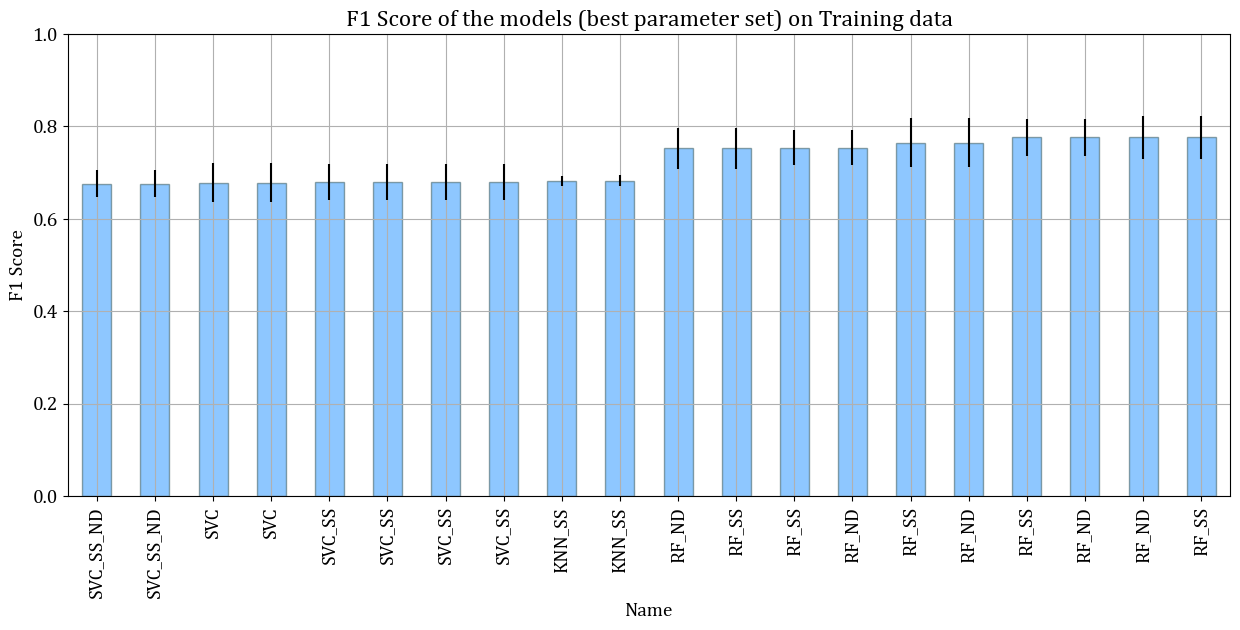

In [17]:
combined_df.sort_values("mean_test_score", inplace=True, ignore_index=True)
sub_df = combined_df.tail(20).copy()
sub_df.plot.bar(x="Name", y="mean_test_score", yerr="std_test_score", color="dodgerblue", alpha=0.5, \
                 edgecolor="darkslategray", title="F1 Score of the models (best parameter set) on Training data", \
                 legend=False, figsize=[15,6], rot=90, grid=True, ylim=[0,1])
plt.ylabel("F1 Score")
plt.show()

In [18]:
model_dict = {"MLP": MLPClassifier(random_state=42), "KNN": KNeighborsClassifier(), \
              "LR": LogisticRegression(max_iter=1000, random_state=42), \
              "RF": RandomForestClassifier(random_state=42), "SVC": SVC(random_state=42)}
accuracy_train_list = []
accuracy_val_list = []
accuracy_test_list = []
f1_train_list = []
f1_val_list = []
f1_test_list = []

for model_idx in tqdm(range(best_df.shape[0])):
    model_name = best_df["model"][model_idx].upper()
    model_ss = best_df["SS"][model_idx]
    model_nd = best_df["norm_data"][model_idx]
    params = eval(best_df["params"][model_idx])
    new_params = {}
    for i in params:
        if "__" in i:
            new_params[i.split("__")[1]] = params[i]
        else:
            new_params[i] = params[i]
    
    if model_ss:
        model = Pipeline([("scaler", StandardScaler()), (model_name.lower(), model_dict[model_name])])
    else:
        model = model
        
    model = model_dict[model_name].set_params(**new_params)
    
    if model_nd:
        model.fit(X_train_norm, y_train)
    else:
        model.fit(X_train, y_train)
    
    if model_nd:
        y_train_norm_pred = model.predict(X_train_norm)
        y_val_norm_pred = model.predict(X_val_norm)
        y_test_norm_pred = model.predict(X_test_norm)
    else:
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)

    if model_nd:
        accuracy_train = accuracy_score(y_train, y_train_norm_pred)
        f1_train = f1_score(y_train, y_train_norm_pred)
        accuracy_val = accuracy_score(y_val, y_val_norm_pred)
        f1_val = f1_score(y_val, y_val_norm_pred)
        accuracy_test = accuracy_score(y_train, y_train_norm_pred)
        f1_test = f1_score(y_train, y_train_norm_pred)
    else:
        accuracy_train = accuracy_score(y_train, y_train_pred)
        f1_train = f1_score(y_train, y_train_pred)
        accuracy_val = accuracy_score(y_val, y_val_pred)
        f1_val = f1_score(y_val, y_val_pred)
        accuracy_test = accuracy_score(y_train, y_train_pred)
        f1_test = f1_score(y_train, y_train_pred)
        
    accuracy_train_list.append(accuracy_train)
    accuracy_val_list.append(accuracy_val)
    accuracy_test_list.append(accuracy_test)
    
    f1_train_list.append(f1_train)
    f1_val_list.append(f1_val)
    f1_test_list.append(f1_test)

  0%|          | 0/19 [00:00<?, ?it/s]

In [19]:
best_df["train_acc"] = accuracy_train_list
best_df["val_acc"] = accuracy_val_list
best_df["test_acc"] = accuracy_test_list
best_df["train_f1"] = f1_train_list
best_df["val_f1"] = f1_val_list
best_df["test_f1"] = f1_test_list

best_df["mean_val_test_acc"] = (best_df["val_acc"]+best_df["test_acc"])/2
best_df["mean_val_test_f1"] = (best_df["val_f1"]+best_df["test_f1"])/2

print("Accuracy: Validation and Test")
best_df.sort_values("mean_val_test_acc", ascending=False, inplace=True)
display(best_df[["name", "Name", "params", "mean_test_score", "train_acc", "train_f1", \
                 "val_acc", "val_f1", "test_acc", "test_f1", "mean_val_test_acc", "mean_val_test_f1"]])

print("F1 Scores: Validation and Test")
best_df.sort_values("mean_val_test_f1", ascending=False, inplace=True)
display(best_df[["name", "Name", "params", "mean_test_score", "train_acc", "train_f1", \
                 "val_acc", "val_f1", "test_acc", "test_f1", "mean_val_test_acc", "mean_val_test_f1"]])

best_df.to_csv(DPATH+"best_df.csv")

Accuracy: Validation and Test


,name,Name,params,mean_test_score,train_acc,train_f1,val_acc,val_f1,test_acc,test_f1,mean_val_test_acc,mean_val_test_f1
17,lr_param_tuning,LR,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.513740,1.000000,1.000000,0.806452,0.777778,1.000000,1.000000,0.903226,0.888889
18,mlp_param_tuning,MLP,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.475821,1.000000,1.000000,0.725806,0.666667,1.000000,1.000000,0.862903,0.833333
5,svc_norm_standard_scaler_param_tuning,SVC_SS_ND,"{'svc__C': 10, 'svc__decision_function_shape':...",0.676239,1.000000,1.000000,0.725806,0.666667,1.000000,1.000000,0.862903,0.833333
15,mlp_norm_param_tuning,MLP_ND,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.579963,1.000000,1.000000,0.693548,0.672414,1.000000,1.000000,0.846774,0.836207
3,svc_standard_scaler_param_tuning,SVC_SS,"{'svc__C': 10, 'svc__decision_function_shape':...",0.679223,1.000000,1.000000,0.677419,0.622642,1.000000,1.000000,0.838710,0.811321
8,knn_param_tuning,KNN,"{'n_neighbors': 10, 'weights': 'uniform'}",0.668387,1.000000,1.000000,0.677419,0.622642,1.000000,1.000000,0.838710,0.811321
0,rf_standard_scaler_param_tuning,RF_SS,"{'rf__max_features': 'sqrt', 'rf__min_samples_...",0.753870,0.996764,0.996032,0.620968,0.494624,0.996764,0.996032,0.808866,0.745328
13,rf_param_tuning,RF,"{'max_features': 'sqrt', 'min_samples_split': ...",0.630105,1.000000,1.000000,0.604839,0.625954,1.000000,1.000000,0.802419,0.812977
2,knn_standard_scaler_param_tuning,KNN_SS,"{'knn__n_neighbors': 10, 'knn__weights': 'unif...",0.682087,1.000000,1.000000,0.588710,0.495050,1.000000,1.000000,0.794355,0.747525
9,svc_norm_param_tuning,SVC_ND,"{'C': 50, 'decision_function_shape': 'ovo', 'd...",0.667079,1.000000,1.000000,0.588710,0.616541,1.000000,1.000000,0.794355,0.808271


F1 Scores: Validation and Test


,name,Name,params,mean_test_score,train_acc,train_f1,val_acc,val_f1,test_acc,test_f1,mean_val_test_acc,mean_val_test_f1
17,lr_param_tuning,LR,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.513740,1.000000,1.000000,0.806452,0.777778,1.000000,1.000000,0.903226,0.888889
15,mlp_norm_param_tuning,MLP_ND,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.579963,1.000000,1.000000,0.693548,0.672414,1.000000,1.000000,0.846774,0.836207
18,mlp_param_tuning,MLP,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.475821,1.000000,1.000000,0.725806,0.666667,1.000000,1.000000,0.862903,0.833333
5,svc_norm_standard_scaler_param_tuning,SVC_SS_ND,"{'svc__C': 10, 'svc__decision_function_shape':...",0.676239,1.000000,1.000000,0.725806,0.666667,1.000000,1.000000,0.862903,0.833333
13,rf_param_tuning,RF,"{'max_features': 'sqrt', 'min_samples_split': ...",0.630105,1.000000,1.000000,0.604839,0.625954,1.000000,1.000000,0.802419,0.812977
7,knn_norm_standard_scaler_param_tuning,KNN_SS_ND,"{'knn__n_neighbors': 10, 'knn__weights': 'dist...",0.669809,1.000000,1.000000,0.564516,0.625000,1.000000,1.000000,0.782258,0.812500
11,knn_norm_param_tuning,KNN_ND,"{'n_neighbors': 10, 'weights': 'distance'}",0.637227,1.000000,1.000000,0.564516,0.625000,1.000000,1.000000,0.782258,0.812500
3,svc_standard_scaler_param_tuning,SVC_SS,"{'svc__C': 10, 'svc__decision_function_shape':...",0.679223,1.000000,1.000000,0.677419,0.622642,1.000000,1.000000,0.838710,0.811321
8,knn_param_tuning,KNN,"{'n_neighbors': 10, 'weights': 'uniform'}",0.668387,1.000000,1.000000,0.677419,0.622642,1.000000,1.000000,0.838710,0.811321
9,svc_norm_param_tuning,SVC_ND,"{'C': 50, 'decision_function_shape': 'ovo', 'd...",0.667079,1.000000,1.000000,0.588710,0.616541,1.000000,1.000000,0.794355,0.808271


In [20]:
model_dict = {"MLP": MLPClassifier(random_state=42), "KNN": KNeighborsClassifier(), \
              "LR": LogisticRegression(max_iter=1000, random_state=42), \
              "RF": RandomForestClassifier(random_state=42), "SVC": SVC(random_state=42)}
accuracy_train_list = []
accuracy_val_list = []
accuracy_test_list = []
f1_train_list = []
f1_val_list = []
f1_test_list = []

for model_idx in tqdm(range(combined_df.shape[0])):
    model_name = combined_df["model"][model_idx].upper()
    model_ss = combined_df["SS"][model_idx]
    model_nd = combined_df["norm_data"][model_idx]
    params = eval(combined_df["params"][model_idx])
    new_params = {}
    for i in params:
        if "__" in i:
            new_params[i.split("__")[1]] = params[i]
        else:
            new_params[i] = params[i]
    
    if model_ss:
        model = Pipeline([("scaler", StandardScaler()), (model_name.lower(), model_dict[model_name])])
    else:
        model = model
        
    model = model_dict[model_name].set_params(**new_params)
    
    if model_nd:
        model.fit(X_train_norm, y_train)
    else:
        model.fit(X_train, y_train)
    
    if model_nd:
        y_train_norm_pred = model.predict(X_train_norm)
        y_val_norm_pred = model.predict(X_val_norm)
        y_test_norm_pred = model.predict(X_test_norm)
    else:
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)

    if model_nd:
        accuracy_train = accuracy_score(y_train, y_train_norm_pred)
        f1_train = f1_score(y_train, y_train_norm_pred)
        accuracy_val = accuracy_score(y_val, y_val_norm_pred)
        f1_val = f1_score(y_val, y_val_norm_pred)
        accuracy_test = accuracy_score(y_train, y_train_norm_pred)
        f1_test = f1_score(y_train, y_train_norm_pred)
    else:
        accuracy_train = accuracy_score(y_train, y_train_pred)
        f1_train = f1_score(y_train, y_train_pred)
        accuracy_val = accuracy_score(y_val, y_val_pred)
        f1_val = f1_score(y_val, y_val_pred)
        accuracy_test = accuracy_score(y_train, y_train_pred)
        f1_test = f1_score(y_train, y_train_pred)
        
    accuracy_train_list.append(accuracy_train)
    accuracy_val_list.append(accuracy_val)
    accuracy_test_list.append(accuracy_test)
    
    f1_train_list.append(f1_train)
    f1_val_list.append(f1_val)
    f1_test_list.append(f1_test)

  0%|          | 0/95 [00:00<?, ?it/s]

In [21]:
combined_df["train_acc"] = accuracy_train_list
combined_df["val_acc"] = accuracy_val_list
combined_df["test_acc"] = accuracy_test_list
combined_df["train_f1"] = f1_train_list
combined_df["val_f1"] = f1_val_list
combined_df["test_f1"] = f1_test_list

combined_df["mean_val_test_acc"] = (combined_df["val_acc"]+combined_df["test_acc"])/2
combined_df["mean_val_test_f1"] = (combined_df["val_f1"]+combined_df["test_f1"])/2

print("Accuracy: Validation and Test")
combined_df.sort_values("mean_val_test_acc", ascending=False, inplace=True)
display(combined_df[["name", "Name", "params", "mean_test_score", "train_acc", "train_f1", \
                 "val_acc", "val_f1", "test_acc", "test_f1", "mean_val_test_acc", "mean_val_test_f1"]])

print("F1 Scores: Validation and Test")
combined_df.sort_values("mean_val_test_f1", ascending=False, inplace=True)
display(combined_df[["name", "Name", "params", "mean_test_score", "train_acc", "train_f1", \
                 "val_acc", "val_f1", "test_acc", "test_f1", "mean_val_test_acc", "mean_val_test_f1"]])

combined_df.to_csv(DPATH+"combined_df.csv")

Accuracy: Validation and Test


,name,Name,params,mean_test_score,train_acc,train_f1,val_acc,val_f1,test_acc,test_f1,mean_val_test_acc,mean_val_test_f1
88,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': ...",0.753870,1.000000,1.0,0.806452,0.777778,1.000000,1.0,0.903226,0.888889
93,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': ...",0.776462,1.000000,1.0,0.798387,0.766355,1.000000,1.0,0.899194,0.883178
92,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': ...",0.775944,1.000000,1.0,0.798387,0.766355,1.000000,1.0,0.899194,0.883178
90,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': ...",0.764653,1.000000,1.0,0.798387,0.770642,1.000000,1.0,0.899194,0.885321
85,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': ...",0.752134,1.000000,1.0,0.782258,0.742857,1.000000,1.0,0.891129,0.871429
...,...,...,...,...,...,...,...,...,...,...,...,...
69,mlp_standard_scaler_param_tuning,MLP_SS,"{'mlp__activation': 'relu', 'mlp__alpha': 1e-0...",0.673263,0.593851,0.0,0.564516,0.000000,0.593851,0.0,0.579184,0.000000
68,mlp_standard_scaler_param_tuning,MLP_SS,"{'mlp__activation': 'relu', 'mlp__alpha': 1e-0...",0.673263,0.593851,0.0,0.564516,0.000000,0.593851,0.0,0.579184,0.000000
67,mlp_standard_scaler_param_tuning,MLP_SS,"{'mlp__activation': 'relu', 'mlp__alpha': 1e-0...",0.673263,0.593851,0.0,0.564516,0.000000,0.593851,0.0,0.579184,0.000000
64,mlp_standard_scaler_param_tuning,MLP_SS,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",0.670677,0.593851,0.0,0.564516,0.000000,0.593851,0.0,0.579184,0.000000


F1 Scores: Validation and Test


,name,Name,params,mean_test_score,train_acc,train_f1,val_acc,val_f1,test_acc,test_f1,mean_val_test_acc,mean_val_test_f1
88,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': ...",0.753870,1.000000,1.0,0.806452,0.777778,1.000000,1.0,0.903226,0.888889
90,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': ...",0.764653,1.000000,1.0,0.798387,0.770642,1.000000,1.0,0.899194,0.885321
92,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': ...",0.775944,1.000000,1.0,0.798387,0.766355,1.000000,1.0,0.899194,0.883178
93,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': ...",0.776462,1.000000,1.0,0.798387,0.766355,1.000000,1.0,0.899194,0.883178
85,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': ...",0.752134,1.000000,1.0,0.782258,0.742857,1.000000,1.0,0.891129,0.871429
...,...,...,...,...,...,...,...,...,...,...,...,...
69,mlp_standard_scaler_param_tuning,MLP_SS,"{'mlp__activation': 'relu', 'mlp__alpha': 1e-0...",0.673263,0.593851,0.0,0.564516,0.000000,0.593851,0.0,0.579184,0.000000
68,mlp_standard_scaler_param_tuning,MLP_SS,"{'mlp__activation': 'relu', 'mlp__alpha': 1e-0...",0.673263,0.593851,0.0,0.564516,0.000000,0.593851,0.0,0.579184,0.000000
67,mlp_standard_scaler_param_tuning,MLP_SS,"{'mlp__activation': 'relu', 'mlp__alpha': 1e-0...",0.673263,0.593851,0.0,0.564516,0.000000,0.593851,0.0,0.579184,0.000000
64,mlp_standard_scaler_param_tuning,MLP_SS,"{'mlp__activation': 'relu', 'mlp__alpha': 0.00...",0.670677,0.593851,0.0,0.564516,0.000000,0.593851,0.0,0.579184,0.000000


,Name,params,mean_val_test_f1,mean_val_test_acc
0,KNN,"{'n_neighbors': 10, 'weights': 'distance'}",0.84,0.81
1,KNN_SS,"{'knn__n_neighbors': 10, 'knn__weights': 'distance'}",0.84,0.81
2,KNN,"{'n_neighbors': 15, 'weights': 'distance'}",0.82,0.79
3,KNN_SS,"{'knn__n_neighbors': 5, 'knn__weights': 'distance'}",0.81,0.79
4,KNN_SS_ND,"{'knn__n_neighbors': 10, 'knn__weights': 'distance'}",0.81,0.78


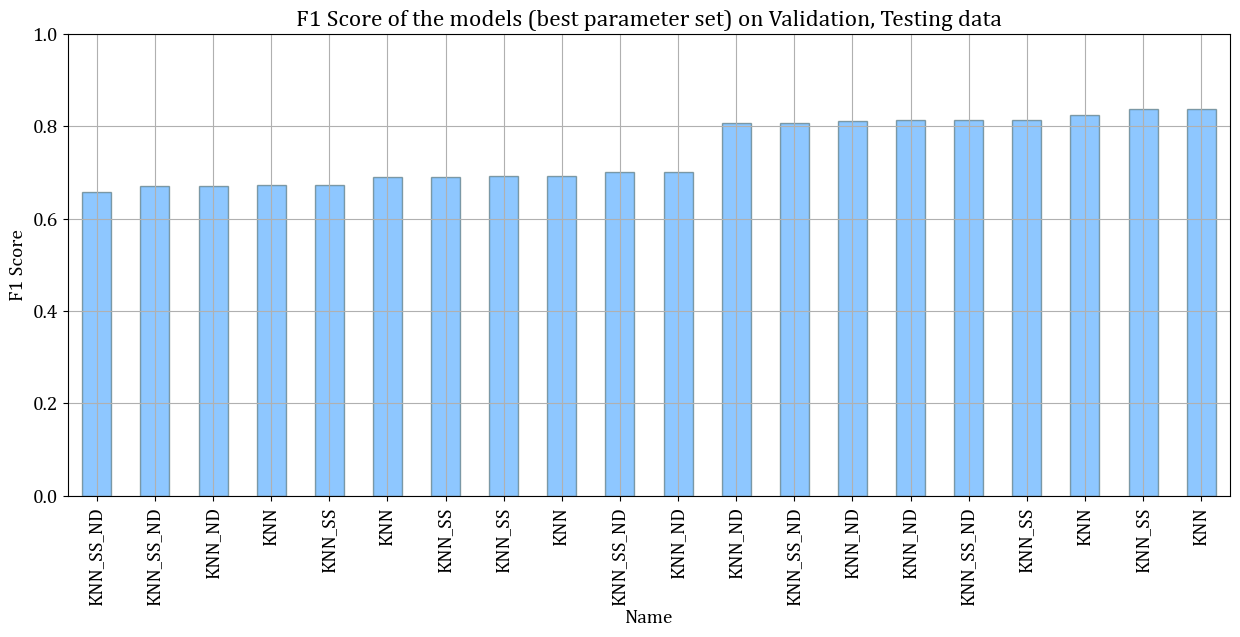

,Name,params,mean_val_test_f1,mean_val_test_acc
0,LR_ND,"{'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}",0.77,0.83
1,LR_SS,"{'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}",0.75,0.78
2,LR_SS_ND,"{'lr__C': 10, 'lr__penalty': 'l1', 'lr__solver': 'saga'}",0.75,0.79
3,LR,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.75,0.79
4,LR_SS,"{'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}",0.75,0.78


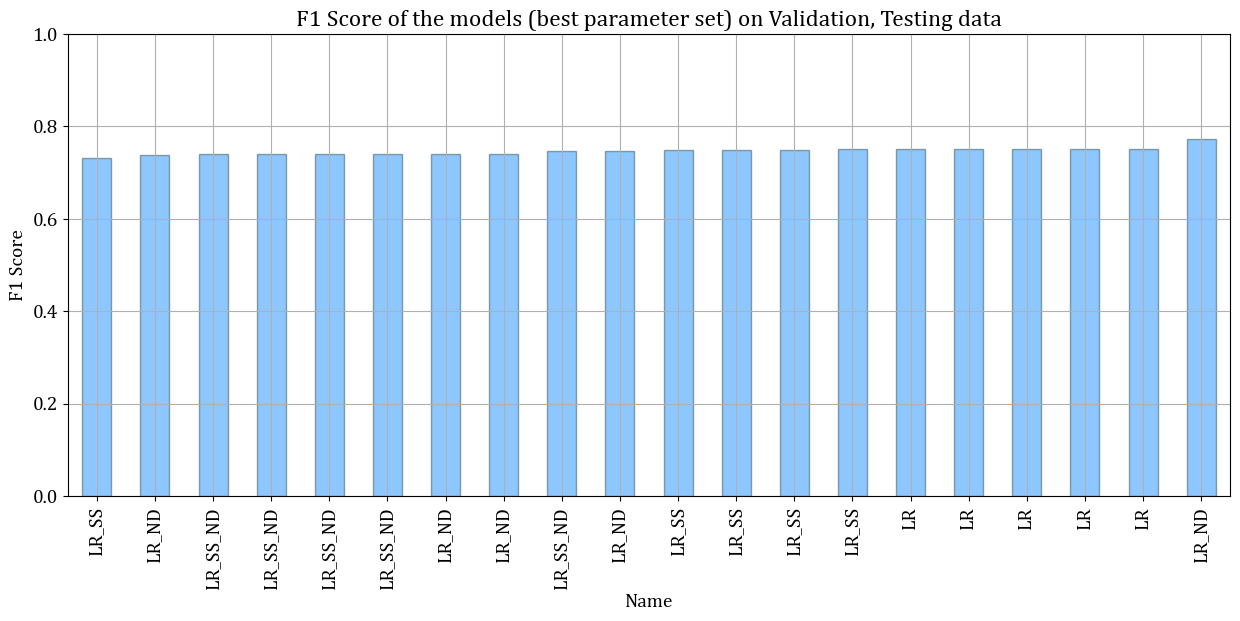

,Name,params,mean_val_test_f1,mean_val_test_acc
0,MLP_SS_ND,"{'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50, 10), 'mlp__learning_rate': 'constant'}",0.81,0.84
1,MLP_ND,"{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 10), 'learning_rate': 'adaptive'}",0.81,0.84
2,MLP_SS_ND,"{'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50, 10), 'mlp__learning_rate': 'invscaling'}",0.81,0.84
3,MLP_SS_ND,"{'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50, 10), 'mlp__learning_rate': 'adaptive'}",0.81,0.84
4,MLP_ND,"{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 10), 'learning_rate': 'invscaling'}",0.81,0.84


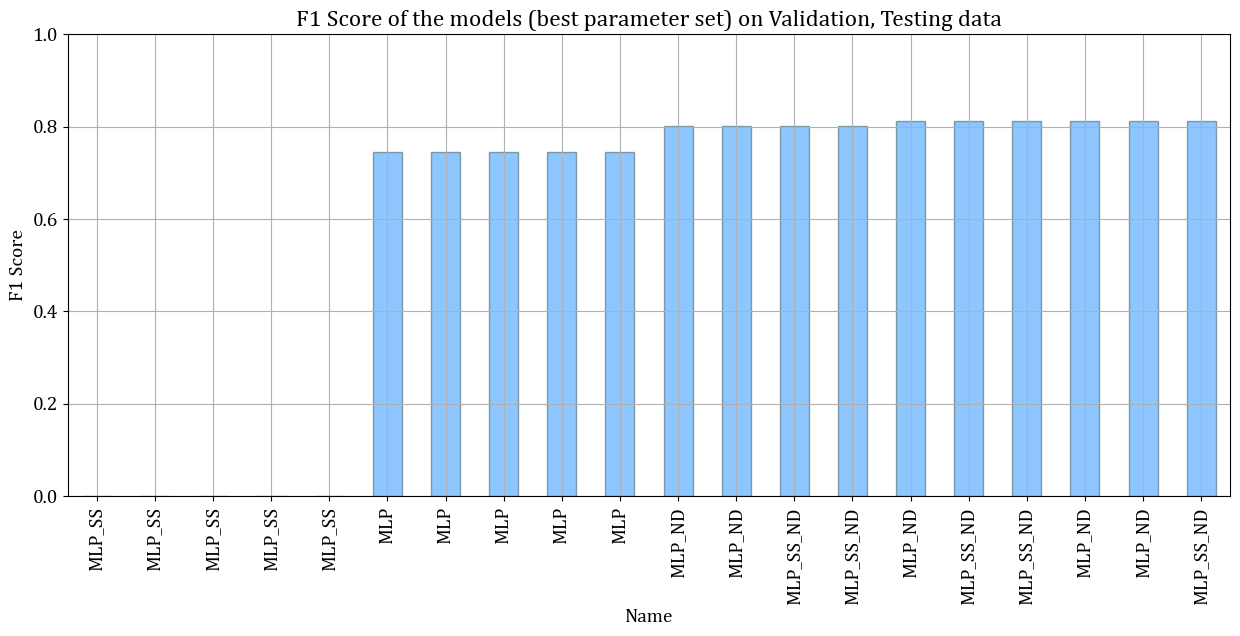

,Name,params,mean_val_test_f1,mean_val_test_acc
0,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}",0.89,0.90
1,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}",0.89,0.90
2,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}",0.88,0.90
3,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}",0.88,0.90
4,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 50}",0.87,0.89


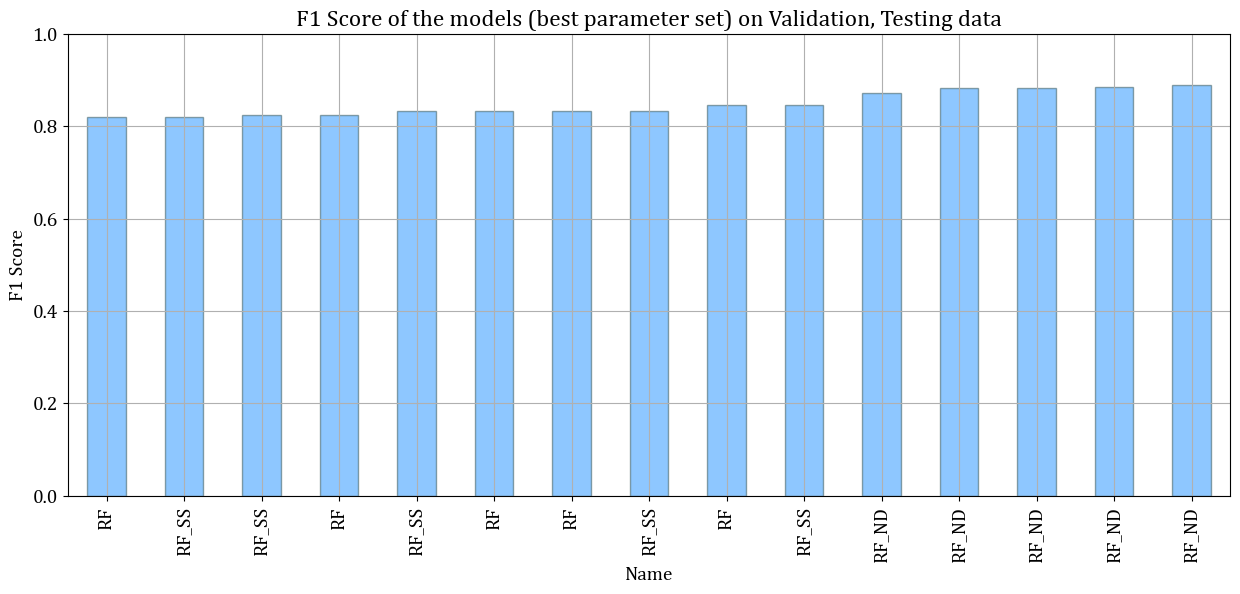

,Name,params,mean_val_test_f1,mean_val_test_acc
0,SVC_SS,"{'svc__C': 10, 'svc__decision_function_shape': 'ovo', 'svc__degree': 3, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}",0.84,0.85
1,SVC_SS,"{'svc__C': 10, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}",0.84,0.85
2,SVC,"{'C': 10, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}",0.82,0.83
3,SVC_SS,"{'svc__C': 10, 'svc__decision_function_shape': 'ovo', 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}",0.82,0.83
4,SVC_SS,"{'svc__C': 10, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}",0.82,0.83


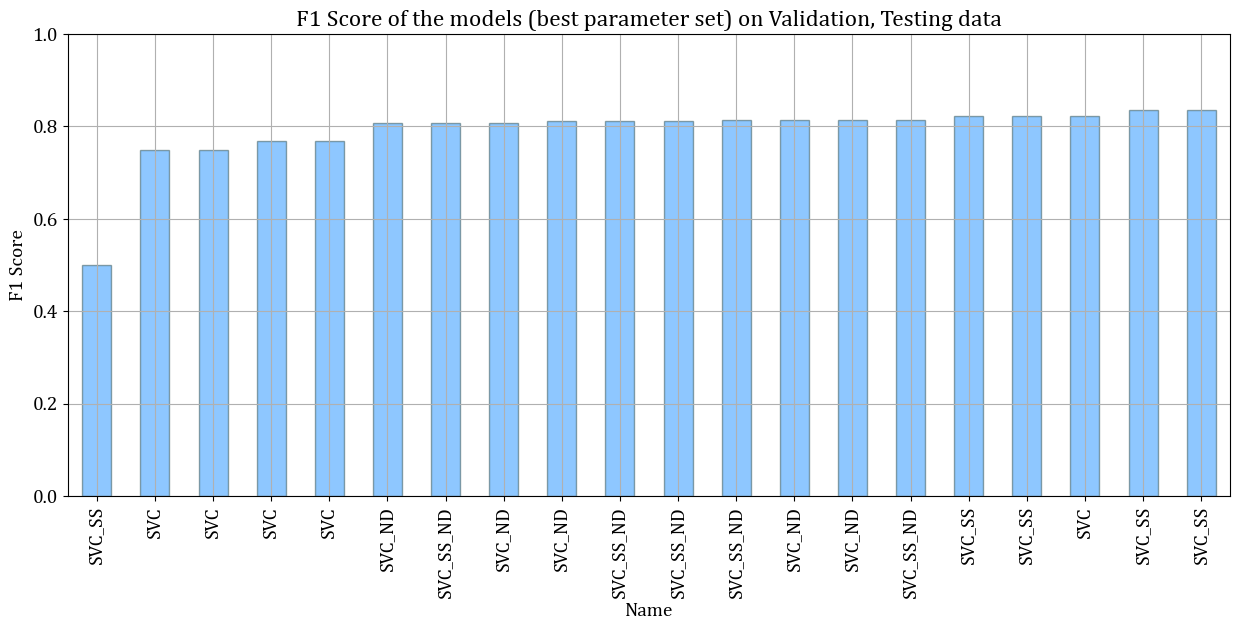

In [22]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

for model_considered, combined_df_group in combined_df.groupby("model"):
    subset_df = combined_df_group[["Name", "train_acc", "val_acc", "test_acc", \
                                   "train_f1", "val_f1", "test_f1", "mean_val_test_acc", \
                                   "mean_val_test_f1", "mean_test_score", "params"]]

    
    rounded_subset_df = subset_df.round({"train_acc": 2, "val_acc": 2, "test_acc": 2, "train_f1": 2, \
                                         "val_f1": 2, "test_f1": 2, "mean_val_test_acc": 2, \
                                         "mean_val_test_f1": 2, "mean_test_score":2})
    
    combined_df_group.sort_values("mean_val_test_f1", inplace=True, ignore_index=True)
    sub_df = combined_df_group.tail(20).copy()
    
    rounded_subset_df.sort_values("mean_val_test_f1", inplace=True, ascending=False, ignore_index=True)
    # display(rounded_subset_df.head(5))
    
    display(rounded_subset_df[["Name", "params", "mean_val_test_f1", "mean_val_test_acc"]].head(5))
    
    sub_df.plot.bar(x="Name", y="mean_val_test_f1", color="dodgerblue", alpha=0.5, \
                     edgecolor="darkslategray", title="F1 Score of the models (best parameter set) on Validation, Testing data", \
                     legend=False, figsize=[15,6], rot=90, grid=True, ylim=[0,1])
    plt.ylabel("F1 Score")
    plt.savefig(IPATH+model_considered+"val_f1.png")
    plt.show()
    
    print("="*80)

,Name,params,mean_val_test_f1,mean_val_test_acc
0,KNN,"{'n_neighbors': 10, 'weights': 'distance'}",0.84,0.81
1,KNN_SS,"{'knn__n_neighbors': 10, 'knn__weights': 'distance'}",0.84,0.81
2,KNN,"{'n_neighbors': 15, 'weights': 'distance'}",0.82,0.79
3,KNN_SS,"{'knn__n_neighbors': 5, 'knn__weights': 'distance'}",0.81,0.79
4,KNN_SS_ND,"{'knn__n_neighbors': 10, 'knn__weights': 'distance'}",0.81,0.78
5,KNN_ND,"{'n_neighbors': 10, 'weights': 'distance'}",0.81,0.78
6,KNN_ND,"{'n_neighbors': 5, 'weights': 'distance'}",0.81,0.79
7,KNN_ND,"{'n_neighbors': 3, 'weights': 'distance'}",0.81,0.78
8,KNN_SS_ND,"{'knn__n_neighbors': 3, 'knn__weights': 'distance'}",0.81,0.78
9,KNN_SS_ND,"{'knn__n_neighbors': 3, 'knn__weights': 'uniform'}",0.70,0.68


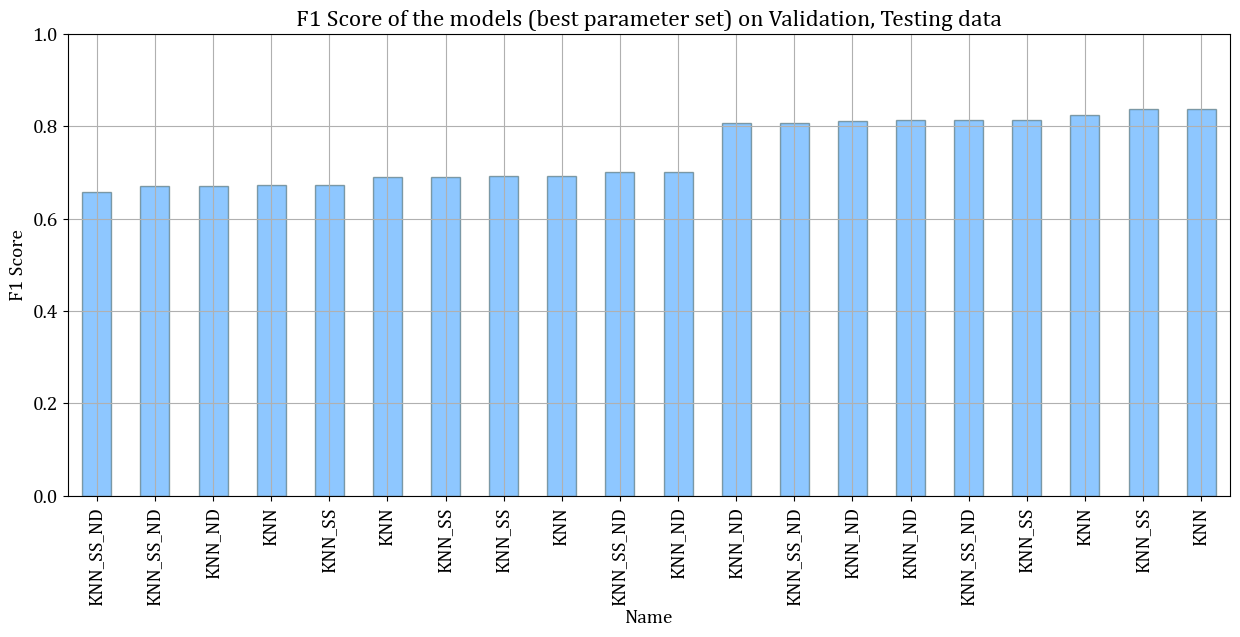

,Name,params,mean_val_test_f1,mean_val_test_acc
0,LR_ND,"{'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}",0.77,0.83
1,LR_SS,"{'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}",0.75,0.78
2,LR_SS_ND,"{'lr__C': 10, 'lr__penalty': 'l1', 'lr__solver': 'saga'}",0.75,0.79
3,LR,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.75,0.79
4,LR_SS,"{'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}",0.75,0.78
5,LR_SS,"{'lr__C': 50, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}",0.75,0.78
6,LR_ND,"{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}",0.75,0.79
7,LR_SS,"{'lr__C': 0.5, 'lr__penalty': 'l1', 'lr__solver': 'saga'}",0.75,0.79
8,LR,"{'C': 50, 'penalty': 'l2', 'solver': 'saga'}",0.75,0.79
9,LR,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.75,0.79


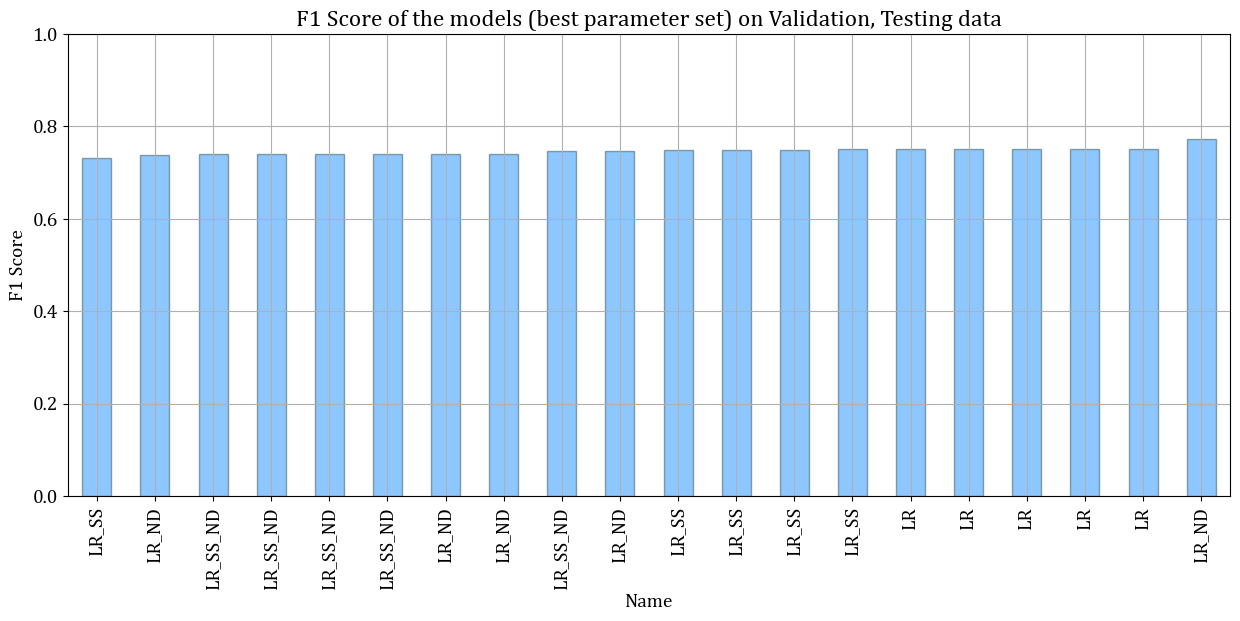

,Name,params,mean_val_test_f1,mean_val_test_acc
0,MLP_SS_ND,"{'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50, 10), 'mlp__learning_rate': 'constant'}",0.81,0.84
1,MLP_ND,"{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 10), 'learning_rate': 'adaptive'}",0.81,0.84
2,MLP_SS_ND,"{'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50, 10), 'mlp__learning_rate': 'invscaling'}",0.81,0.84
3,MLP_SS_ND,"{'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50, 10), 'mlp__learning_rate': 'adaptive'}",0.81,0.84
4,MLP_ND,"{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 10), 'learning_rate': 'invscaling'}",0.81,0.84
5,MLP_ND,"{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 10), 'learning_rate': 'constant'}",0.81,0.84
6,MLP_SS_ND,"{'mlp__activation': 'relu', 'mlp__alpha': 1e-06, 'mlp__hidden_layer_sizes': (50, 10), 'mlp__learning_rate': 'invscaling'}",0.80,0.83
7,MLP_ND,"{'activation': 'relu', 'alpha': 1e-06, 'hidden_layer_sizes': (50, 10), 'learning_rate': 'invscaling'}",0.80,0.83
8,MLP_SS_ND,"{'mlp__activation': 'relu', 'mlp__alpha': 1e-06, 'mlp__hidden_layer_sizes': (50, 10), 'mlp__learning_rate': 'constant'}",0.80,0.83
9,MLP_ND,"{'activation': 'relu', 'alpha': 1e-06, 'hidden_layer_sizes': (50, 10), 'learning_rate': 'constant'}",0.80,0.83


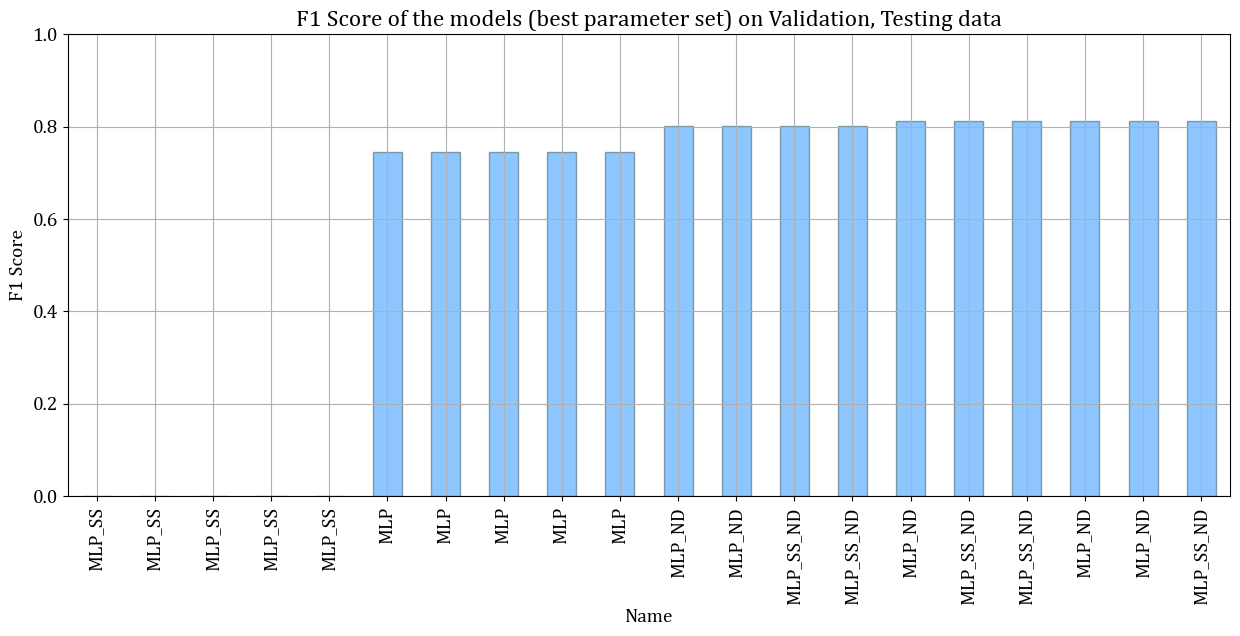

,Name,params,mean_val_test_f1,mean_val_test_acc
0,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}",0.89,0.90
1,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}",0.89,0.90
2,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}",0.88,0.90
3,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}",0.88,0.90
4,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 50}",0.87,0.89
5,RF,"{'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 50}",0.85,0.87
6,RF_SS,"{'rf__max_features': 'sqrt', 'rf__min_samples_split': 4, 'rf__n_estimators': 50}",0.85,0.87
7,RF,"{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}",0.83,0.86
8,RF_SS,"{'rf__max_features': 'sqrt', 'rf__min_samples_split': 2, 'rf__n_estimators': 50}",0.83,0.86
9,RF_SS,"{'rf__max_features': 'sqrt', 'rf__min_samples_split': 2, 'rf__n_estimators': 100}",0.83,0.87


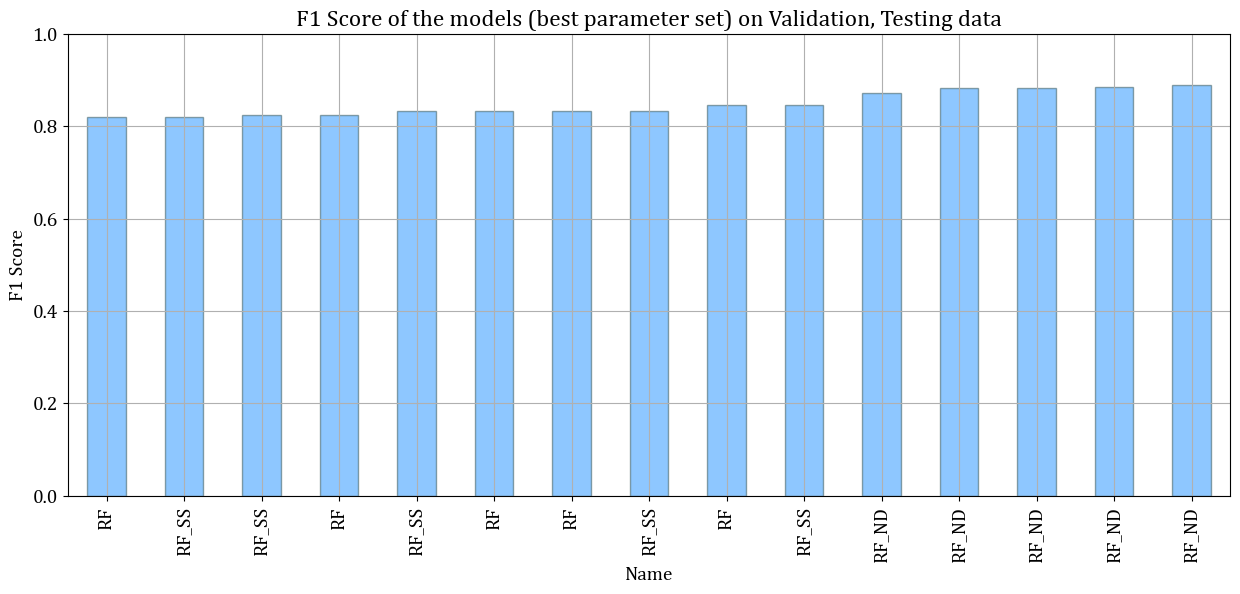

,Name,params,mean_val_test_f1,mean_val_test_acc
0,SVC_SS,"{'svc__C': 10, 'svc__decision_function_shape': 'ovo', 'svc__degree': 3, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}",0.84,0.85
1,SVC_SS,"{'svc__C': 10, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}",0.84,0.85
2,SVC,"{'C': 10, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}",0.82,0.83
3,SVC_SS,"{'svc__C': 10, 'svc__decision_function_shape': 'ovo', 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}",0.82,0.83
4,SVC_SS,"{'svc__C': 10, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}",0.82,0.83
5,SVC_ND,"{'C': 50, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}",0.81,0.79
6,SVC_SS_ND,"{'svc__C': 50, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}",0.81,0.79
7,SVC_ND,"{'C': 50, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}",0.81,0.79
8,SVC_ND,"{'C': 10, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}",0.81,0.80
9,SVC_SS_ND,"{'svc__C': 10, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}",0.81,0.80


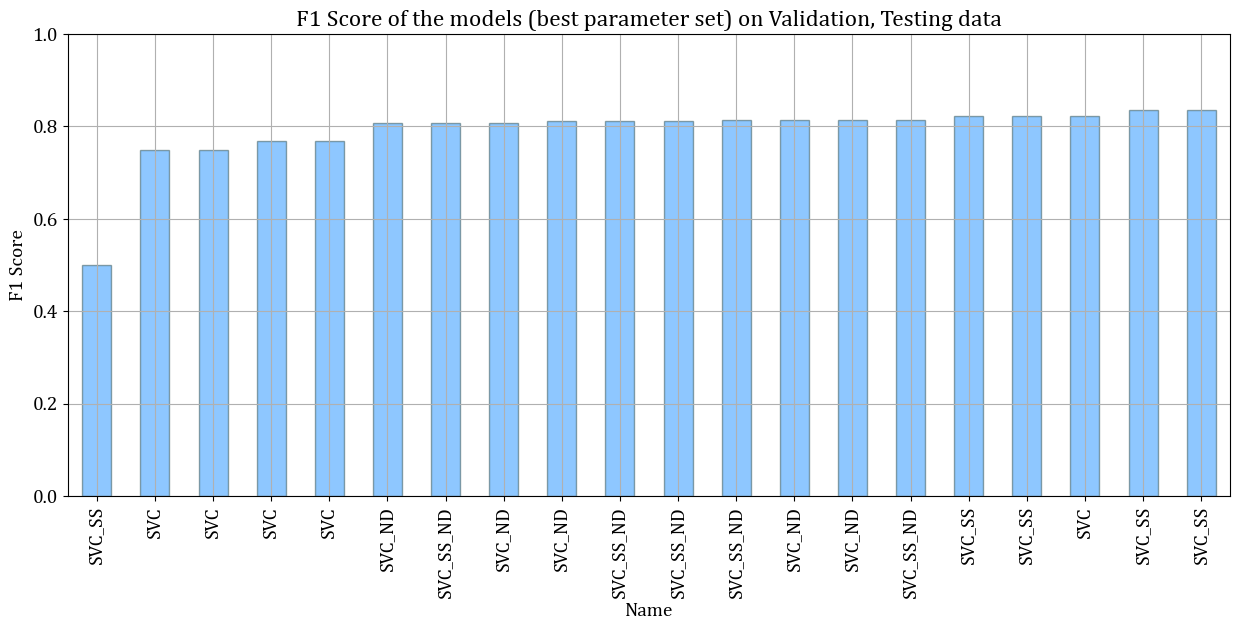

In [23]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

for model_considered, combined_df_group in combined_df.groupby("model"):
    subset_df = combined_df_group[["Name", "train_acc", "val_acc", "test_acc", \
                                   "train_f1", "val_f1", "test_f1", "mean_val_test_acc", \
                                   "mean_val_test_f1", "mean_test_score", "params"]]

    
    rounded_subset_df = subset_df.round({"train_acc": 2, "val_acc": 2, "test_acc": 2, "train_f1": 2, \
                                         "val_f1": 2, "test_f1": 2, "mean_val_test_acc": 2, \
                                         "mean_val_test_f1": 2, "mean_test_score":2})
    
    combined_df_group.sort_values("mean_val_test_f1", inplace=True, ignore_index=True)
    sub_df = combined_df_group.copy()
    
    rounded_subset_df.sort_values("mean_val_test_f1", inplace=True, ascending=False, ignore_index=True)
    # display(rounded_subset_df.head(5))
    
    display(rounded_subset_df[["Name", "params", "mean_val_test_f1", "mean_val_test_acc"]].head(50))
    
    sub_df.plot.bar(x="Name", y="mean_val_test_f1", color="dodgerblue", alpha=0.5, \
                     edgecolor="darkslategray", title="F1 Score of the models (best parameter set) on Validation, Testing data", \
                     legend=False, figsize=[15,6], rot=90, grid=True, ylim=[0,1])
    plt.ylabel("F1 Score")
    plt.savefig(IPATH+model_considered+"val_f1.png")
    plt.show()
    
    print("="*80)

In [29]:
combined_df[["name", "Name", "params", "mean_val_test_f1", "mean_val_test_acc"]].head(15)

,name,Name,params,mean_val_test_f1,mean_val_test_acc
88,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}",0.888889,0.903226
90,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}",0.885321,0.899194
92,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}",0.883178,0.899194
93,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}",0.883178,0.899194
85,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 50}",0.871429,0.891129
25,rf_param_tuning,RF,"{'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 50}",0.845794,0.866935
86,rf_standard_scaler_param_tuning,RF_SS,"{'rf__max_features': 'sqrt', 'rf__min_samples_split': 4, 'rf__n_estimators': 50}",0.845794,0.866935
54,knn_param_tuning,KNN,"{'n_neighbors': 10, 'weights': 'distance'}",0.837931,0.810484
83,knn_standard_scaler_param_tuning,KNN_SS,"{'knn__n_neighbors': 10, 'knn__weights': 'distance'}",0.837931,0.810484
81,svc_standard_scaler_param_tuning,SVC_SS,"{'svc__C': 10, 'svc__decision_function_shape': 'ovo', 'svc__degree': 3, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}",0.836207,0.846774


In [32]:
df_tmp = pd.read_csv(DPATH+"combined_df.csv", index_col=0)
df_tmp[["name", "Name", "params", "mean_val_test_f1", "mean_val_test_acc"]].head(10)

,name,Name,params,mean_val_test_f1,mean_val_test_acc
88,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}",0.888889,0.903226
90,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}",0.885321,0.899194
92,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}",0.883178,0.899194
93,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}",0.883178,0.899194
85,rf_norm_param_tuning,RF_ND,"{'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 50}",0.871429,0.891129
25,rf_param_tuning,RF,"{'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 50}",0.845794,0.866935
86,rf_standard_scaler_param_tuning,RF_SS,"{'rf__max_features': 'sqrt', 'rf__min_samples_split': 4, 'rf__n_estimators': 50}",0.845794,0.866935
54,knn_param_tuning,KNN,"{'n_neighbors': 10, 'weights': 'distance'}",0.837931,0.810484
83,knn_standard_scaler_param_tuning,KNN_SS,"{'knn__n_neighbors': 10, 'knn__weights': 'distance'}",0.837931,0.810484
81,svc_standard_scaler_param_tuning,SVC_SS,"{'svc__C': 10, 'svc__decision_function_shape': 'ovo', 'svc__degree': 3, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}",0.836207,0.846774
